## Steeter-Phelps Model

Dissolved oxygen (DO) is a critical component of the health of an aquatic ecosystem. The introduction of organic wastes into waterways acts as a food source for microorganisms that simultaneously reduce the DO. The biochemical oxygen demand (BOD) is a measure of the amount of organic waste present in a water sample. The Streeter–Phelps model is often used to describe how DO and BOD change with distance in a river or stream due to degradation of BOD and re-aeration from the atmosphere. The model relates the DO concentration $C$ and BOD concentrations $L$ at location $x$ downstream from a point source of BOD as follows:

$C(x)=C_{s} - \left[  \frac{k_{d}L_{0}}{k_{r}-k_{d}} ( e^{\frac{-k_{d}x}{U}} - e^{\frac{-k_{r}x}{U}} ) + ( C_{s} - C_{0} ) e^{\frac{-k_{r}x}{U}} \right]$

$L(x)=L_{0}e^{ \frac{-k_{d}x}{U}}$

| Parameter |  Symbol |
|:----------|:-------------|
| Saturated DO concentration  |  $C_{s}$ |
| Initial DO concentration |  $C_{0}$ |
| Initial BOD concentration |  $L_{0}$ |
| BOD degradation rate | $k_{d}$| 
| Oxygen re-aeration rate |$k_{a}$ | 
| River velocity |$U$ | 

The values of these parameters for the model must be defined in Python to explore their relationships.

In [39]:
Cs = 9    # mg/L
C0 = 7    # mg/L
L0 = 20  # mg/L
kd = 0.2  # 1/hr
kr = 0.3   # 1/hr
U = 2       # km/hr

To incorporate the model in Python, functions must be defined for DO and BOD. The NumPy Python library is needed for this exercise for basic functions and array development. The "#" is used to make comments in the code.

In [6]:
# import the numpy library using np "alias" to shorten the amount of code writing
import numpy as np

# define the BOD function
def L(x, L0, kd, U): 
    return L0 * np.exp(-1 * kd * x / U)

# define the DO function
def C(x, Cs, C0, L0, kd, kr, U):
    return Cs - (kd * L0 / (kr - kd) * (np.exp(-kd*x/U) - np.exp(-kr*x/U)) + (Cs - C0) * np.exp(-kr*x/U))

To apply the model for these parameters, it's easiest to make $x$ values representing points in a river for the model using numpy's "arange" function, which provides an array of values given the (start, end, increment) arguments.

In [27]:
x = np.arange(0,50,0.2)  # km

The BOD and DO at every point $x$ in the river can be determined using the functions. An array of uniform values for a "critical" DO level of 5 mg/L for the river is also constructed.

In [29]:
BOD = L(x, L0, kd, U)                     # array of BOD values in mg/L
DO = C(x, Cs, C0, L0, kd, kr, U)     # array of DO values in mg/L
critical = 5 * np.ones(len(x))    # array of critical DO values in mg/L

The matplotlib library can now be used to plot the results, including a line showing a critical DO of 5 mg/L for this river.

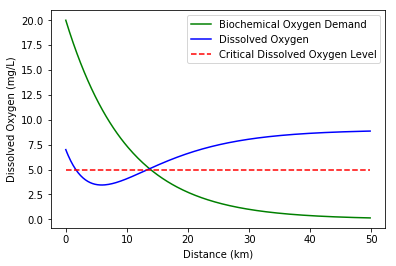

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,BOD, 'g-', label = "Biochemical Oxygen Demand")
plt.plot(x,DO, 'b-', label = "Dissolved Oxygen")
plt.plot(x,critical, 'r--', label = "Critical Dissolved Oxygen Level")
plt.xlabel("Distance (km)")
plt.ylabel("Dissolved Oxygen (mg/L)")
leg = plt.legend()

Note that for the default parameter values above, the DO drops below the critical level for ~10 km.